In [1]:
import numpy as np
import random


In [2]:
def criterio_paro(gradiente, tol):
    return np.linalg.norm(gradiente) < tol

### Método 1: Descenso de Gradiente Naïve con Dirección Aleatoria

In [3]:
# Modificación de descenso_gradiente_naive_aleatorio
def descenso_gradiente_naive_aleatorio(f, df, x0, alpha, maxIter, tol):
    xk = x0.copy()  # Usamos copy para evitar modificar x0 original
    iteraciones = [x0.copy()]
    valores_f = [f(x0)]
    errores = []
    
    for k in range(maxIter):
        # Dirección de descenso aleatoria solo en las primeras dos componentes
        direccion = np.random.randn(2)
        direccion /= np.linalg.norm(direccion)  # Normalizamos
        
        # Actualizamos solo las dos primeras componentes
        xk[:2] = xk[:2] - alpha * direccion
        iteraciones.append(xk.copy())
        valores_f.append(f(xk))
        
        # Error basado en el criterio de paro (norma del gradiente)
        gradiente = df(xk)
        error = np.linalg.norm(gradiente[:2])  # Solo consideramos las dos primeras componentes del gradiente
        errores.append(error)
        
        if criterio_paro(gradiente[:2], tol):  # Solo verificamos las primeras dos componentes
            return xk, iteraciones, valores_f, errores, k+1, True
    
    return xk, iteraciones, valores_f, errores, maxIter, False

### Método 2: Descenso Máximo Naïve

In [4]:
# Modificación de descenso_maximo_naive
def descenso_maximo_naive(f, df, x0, alpha, maxIter, tol):
    xk = x0.copy()
    iteraciones = [x0.copy()]
    valores_f = [f(x0)]
    errores = []
    
    for k in range(maxIter):
        # Dirección de máximo descenso (negativo del gradiente), solo en las primeras dos componentes
        direccion = -df(xk)[:2]
        
        # Actualizamos solo las dos primeras componentes
        xk[:2] = xk[:2] - alpha * direccion
        iteraciones.append(xk.copy())
        valores_f.append(f(xk))
        
        # Error basado en el criterio de paro (norma del gradiente)
        gradiente = df(xk)
        error = np.linalg.norm(gradiente[:2])  # Solo consideramos las dos primeras componentes
        errores.append(error)
        
        if criterio_paro(gradiente[:2], tol):
            return xk, iteraciones, valores_f, errores, k+1, True
    
    return xk, iteraciones, valores_f, errores, maxIter, False

### Método 3: Descenso de Gradiente de Newton (con Hessiano Aproximado)

In [5]:
# Modificación de descenso_newton_aproximado
def descenso_newton_aproximado(f, df, x0, alpha, maxIter, tol):
    xk = x0.copy()
    iteraciones = [x0.copy()]
    valores_f = [f(x0)]
    errores = []
    
    # Inicialización de una matriz identidad de tamaño 2x2
    Hk = np.eye(2)
    
    for k in range(maxIter):
        gradiente = df(xk)[:2]  # Solo consideramos las dos primeras componentes
        direccion = -np.dot(Hk, gradiente)  # Dirección de descenso de Newton aproximado
        
        xk_new = xk.copy()
        xk_new[:2] = xk[:2] + alpha * direccion
        
        sk = xk_new[:2] - xk[:2]
        yk = df(xk_new)[:2] - gradiente
        
        xk = xk_new
        iteraciones.append(xk.copy())
        valores_f.append(f(xk))
        
        # Actualización del Hessiano utilizando la fórmula de BFGS, solo en la submatriz de 2x2
        rho_k = 1.0 / np.dot(yk.T, sk)
        Hk = (np.eye(2) - rho_k * np.outer(sk, yk)).dot(Hk).dot(np.eye(2) - rho_k * np.outer(yk, sk)) + rho_k * np.outer(sk, sk)
        
        # Error basado en el criterio de paro
        error = np.linalg.norm(gradiente)
        errores.append(error)
        
        if criterio_paro(gradiente, tol):
            return xk, iteraciones, valores_f, errores, k+1, True
    
    return xk, iteraciones, valores_f, errores, maxIter, False

### Método 4: Descenso de Gradiente de Newton (con Hessiano Exacto)

In [6]:
# Modificación de descenso_newton_exacto
def descenso_newton_exacto(f, df, ddf, x0, alpha, maxIter, tol):
    xk = x0.copy()
    iteraciones = [x0.copy()]
    valores_f = [f(x0)]
    errores = []
    
    for k in range(maxIter):
        gradiente = df(xk)[:2]  # Solo las dos primeras componentes
        Hessiano = ddf(xk)[:2, :2]  # Solo la submatriz de 2x2 del Hessiano
        
        direccion = -np.linalg.solve(Hessiano, gradiente)  # Dirección de Newton exacta
        
        xk[:2] = xk[:2] + alpha * direccion
        iteraciones.append(xk.copy())
        valores_f.append(f(xk))
        
        # Error basado en el criterio de paro
        error = np.linalg.norm(gradiente)
        errores.append(error)
        
        if criterio_paro(gradiente, tol):
            return xk, iteraciones, valores_f, errores, k+1, True
    
    return xk, iteraciones, valores_f, errores, maxIter, False

In [7]:
def f(x):
    return x[0]**4 + x[1]**4 - 4*x[0]*x[1] + 0.5*x[1] + 1

def df(x):
    return np.array([
        4*x[0]**3 - 4*x[1], 
        4*x[1]**3 - 4*x[0] + 0.5, 
        0,
        0
    ])

def ddf(x):
    return np.array([
        [12*x[0]**2, -4, 0, 0],
        [-4, 12*x[1]**2, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]
    ])


# Punto inicial
x0 = np.array([-3.0, 1.0, -3.0, 1.0])

# Parámetros
alpha = 0.1
maxIter = 100
tol = 1e-6

# Ejecutamos los métodos
resultado_naive_aleatorio = descenso_gradiente_naive_aleatorio(f, df, x0, alpha, maxIter, tol)

print("Resultado:", resultado_naive_aleatorio[0])


resultado_maximo_naive = descenso_maximo_naive(f, df, x0, alpha, maxIter, tol)
resultado_newton_aproximado = descenso_newton_aproximado(f, df, x0, alpha, maxIter, tol)
resultado_newton_exacto = descenso_newton_exacto(f, df, ddf, x0, alpha, maxIter, tol)


Resultado: [-3.80854124 -0.11008235 -3.          1.        ]


C:\Users\acer\AppData\Local\Temp\ipykernel_652\2148770513.py:2: RuntimeWarning: overflow encountered in scalar power
  return x[0]**4 + x[1]**4 - 4*x[0]*x[1] + 0.5*x[1] + 1
C:\Users\acer\AppData\Local\Temp\ipykernel_652\2148770513.py:2: RuntimeWarning: overflow encountered in scalar multiply
  return x[0]**4 + x[1]**4 - 4*x[0]*x[1] + 0.5*x[1] + 1
C:\Users\acer\AppData\Local\Temp\ipykernel_652\2148770513.py:6: RuntimeWarning: overflow encountered in scalar power
  4*x[0]**3 - 4*x[1],
C:\Users\acer\AppData\Local\Temp\ipykernel_652\2148770513.py:7: RuntimeWarning: overflow encountered in scalar power
  4*x[1]**3 - 4*x[0] + 0.5,


In [8]:
import matplotlib.pyplot as plt

def mostrar_resultados(nombre_metodo, x_final, iteraciones, valores_f, errores, num_iter, convergencia):
    print(f"--- {nombre_metodo} ---")
    print(f"Última solución encontrada (x): {x_final}")
    print(f"Número de iteraciones: {num_iter}")
    print(f"Convergencia: {'Sí' if convergencia else 'No'}")
    print(f"Valores de la función objetivo f(x) en cada iteración:")
    for i, valor in enumerate(valores_f):
        print(f"Iteración {i}: f(x) = {valor}")
    
    print(f"\nErrores (norma del gradiente) en cada iteración:")
    for i, error in enumerate(errores):
        print(f"Iteración {i}: Error = {error}")
    
    # Graficar valores de la función objetivo y errores
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    
    # Gráfico de f(x) vs iteraciones
    ax[0].plot(range(num_iter+1), valores_f, marker='o', label='f(x)')
    ax[0].set_title(f'{nombre_metodo}: f(x) vs Iteraciones')
    ax[0].set_xlabel('Iteración')
    ax[0].set_ylabel('f(x)')
    ax[0].grid(True)
    ax[0].legend()

    # Gráfico de errores vs iteraciones
    ax[1].plot(range(num_iter), errores, marker='o', color='r', label='Error')
    ax[1].set_title(f'{nombre_metodo}: Error vs Iteraciones')
    ax[1].set_xlabel('Iteración')
    ax[1].set_ylabel('Error')
    ax[1].grid(True)
    ax[1].legend()

    plt.tight_layout()
    plt.show()


# Mostrar resultados

--- Descenso Gradiente Naïve con Dirección Aleatoria ---
Última solución encontrada (x): [-3.80854124 -0.11008235 -3.          1.        ]
Número de iteraciones: 100
Convergencia: No
Valores de la función objetivo f(x) en cada iteración:
Iteración 0: f(x) = 95.5
Iteración 1: f(x) = 96.04967026175281
Iteración 2: f(x) = 105.88376059003824
Iteración 3: f(x) = 110.56864441226803
Iteración 4: f(x) = 115.58852621700257
Iteración 5: f(x) = 117.13455350842158
Iteración 6: f(x) = 125.76653761132138
Iteración 7: f(x) = 113.46050533124283
Iteración 8: f(x) = 110.97036136312359
Iteración 9: f(x) = 119.135235390917
Iteración 10: f(x) = 130.58657286379577
Iteración 11: f(x) = 130.06472619866057
Iteración 12: f(x) = 144.6639259280336
Iteración 13: f(x) = 136.82199618157824
Iteración 14: f(x) = 136.22468526188052
Iteración 15: f(x) = 135.79889285563465
Iteración 16: f(x) = 148.37299354433145
Iteración 17: f(x) = 148.54633088375633
Iteración 18: f(x) = 164.84023686377034
Iteración 19: f(x) = 172.56132

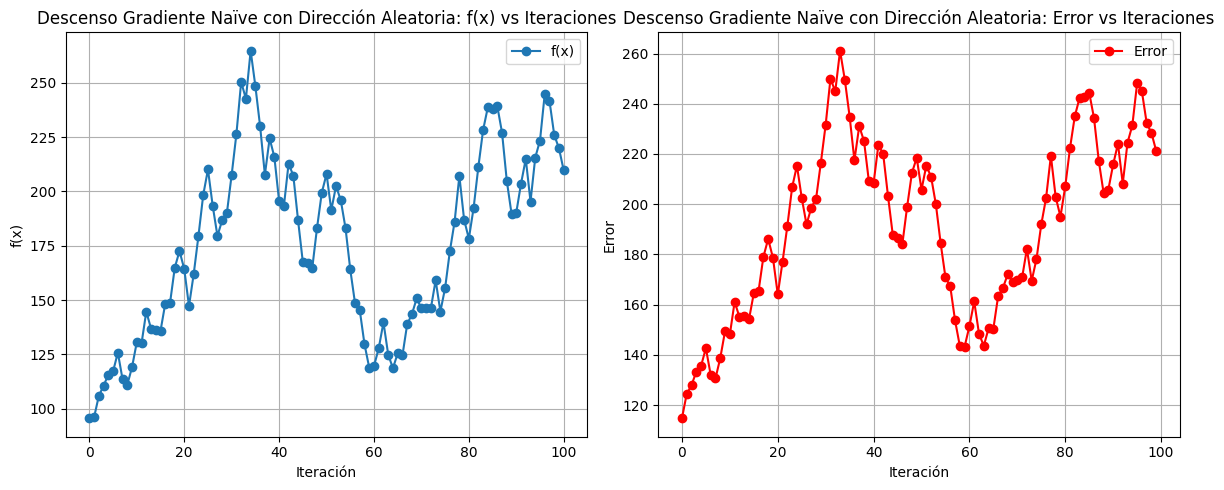

In [9]:

mostrar_resultados("Descenso Gradiente Naïve con Dirección Aleatoria", *resultado_naive_aleatorio)

--- Descenso Máximo Naïve ---
Última solución encontrada (x): [-inf  inf  -3.   1.]
Número de iteraciones: 100
Convergencia: No
Valores de la función objetivo f(x) en cada iteración:
Iteración 0: f(x) = 95.5
Iteración 1: f(x) = 40860.85010625001
Iteración 2: f(x) = 1814233477756.4434
Iteración 3: f(x) = 1.5287013157215038e+35
Iteración 4: f(x) = 9.14550904098098e+103
Iteración 5: f(x) = inf
Iteración 6: f(x) = inf
Iteración 7: f(x) = inf
Iteración 8: f(x) = inf
Iteración 9: f(x) = inf
Iteración 10: f(x) = inf
Iteración 11: f(x) = inf
Iteración 12: f(x) = inf
Iteración 13: f(x) = inf
Iteración 14: f(x) = inf
Iteración 15: f(x) = inf
Iteración 16: f(x) = inf
Iteración 17: f(x) = inf
Iteración 18: f(x) = inf
Iteración 19: f(x) = inf
Iteración 20: f(x) = inf
Iteración 21: f(x) = inf
Iteración 22: f(x) = inf
Iteración 23: f(x) = inf
Iteración 24: f(x) = inf
Iteración 25: f(x) = inf
Iteración 26: f(x) = inf
Iteración 27: f(x) = inf
Iteración 28: f(x) = inf
Iteración 29: f(x) = inf
Iteración 

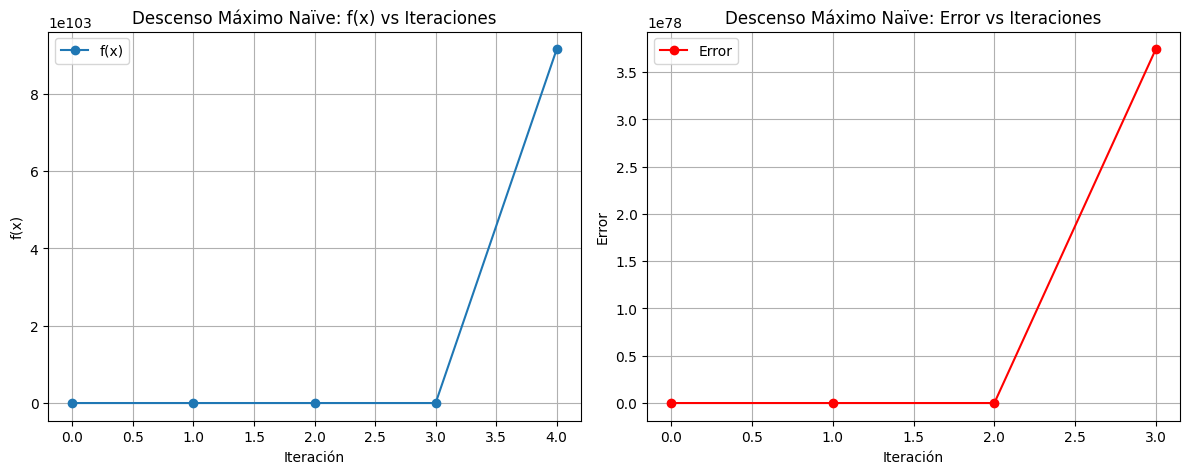

In [10]:
mostrar_resultados("Descenso Máximo Naïve", *resultado_maximo_naive)

--- Descenso Gradiente de Newton Aproximado ---
Última solución encontrada (x): [ 0.99032664  0.95960011 -3.          1.        ]
Número de iteraciones: 100
Convergencia: No
Valores de la función objetivo f(x) en cada iteración:
Iteración 0: f(x) = 95.5
Iteración 1: f(x) = 4543.391106250003
Iteración 2: f(x) = 2615.7269059123346
Iteración 3: f(x) = 4052.505099810389
Iteración 4: f(x) = 2873.663194428979
Iteración 5: f(x) = 2517.6985545376233
Iteración 6: f(x) = 2205.6367777532464
Iteración 7: f(x) = 1931.9225269060198
Iteración 8: f(x) = 1692.0213223901467
Iteración 9: f(x) = 1481.7614375260428
Iteración 10: f(x) = 1297.490221969399
Iteración 11: f(x) = 1136.004366472497
Iteración 12: f(x) = 994.4948196904483
Iteración 13: f(x) = 870.4982961420594
Iteración 14: f(x) = 761.8547507867917
Iteración 15: f(x) = 666.6700814019604
Iteración 16: f(x) = 583.283416372643
Iteración 17: f(x) = 510.23842428625466
Iteración 18: f(x) = 446.25815099446936
Iteración 19: f(x) = 390.22295055830534
Iterac

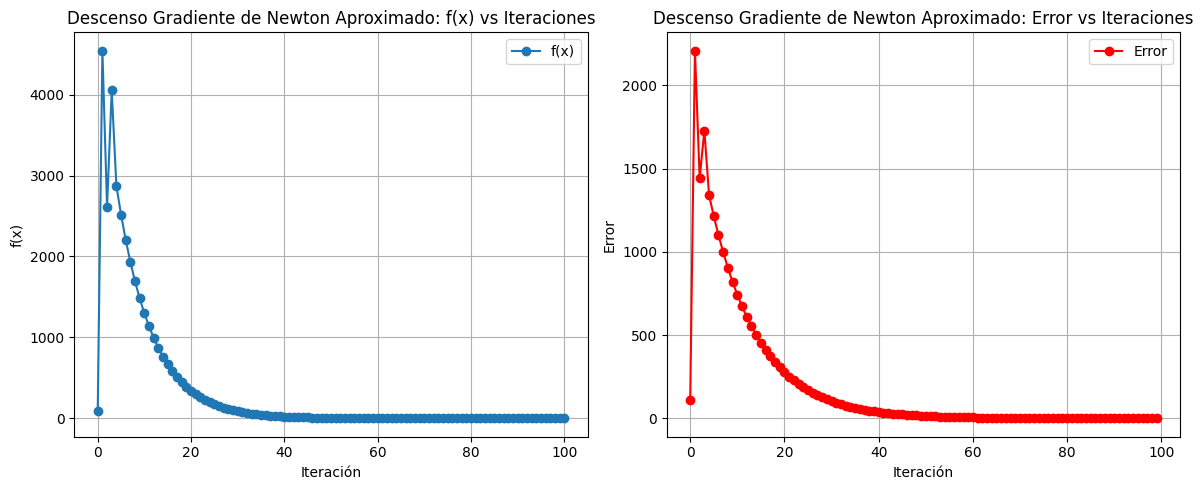

In [11]:
mostrar_resultados("Descenso Gradiente de Newton Aproximado", *resultado_newton_aproximado)

--- Descenso Gradiente de Newton Exacto ---
Última solución encontrada (x): [-2.01985536 -8.08354783 -3.          1.        ]
Número de iteraciones: 100
Convergencia: No
Valores de la función objetivo f(x) en cada iteración:
Iteración 0: f(x) = 95.5
Iteración 1: f(x) = 83.22674169782961
Iteración 2: f(x) = 72.3737765875911
Iteración 3: f(x) = 62.69270541882499
Iteración 4: f(x) = 53.857622822745654
Iteración 5: f(x) = 44.99119121726772
Iteración 6: f(x) = 1459052469.4321358
Iteración 7: f(x) = 1274024576.4448144
Iteración 8: f(x) = 1112460746.3172235
Iteración 9: f(x) = 971385416.3754364
Iteración 10: f(x) = 848200365.7578406
Iteración 11: f(x) = 740636863.3452709
Iteración 12: f(x) = 646713883.9836785
Iteración 13: f(x) = 564701623.4574281
Iteración 14: f(x) = 493089640.25966305
Iteración 15: f(x) = 430559037.4190267
Iteración 16: f(x) = 375958172.04871345
Iteración 17: f(x) = 328281445.254742
Iteración 18: f(x) = 286650781.7720562
Iteración 19: f(x) = 250299458.23442486
Iteración 20:

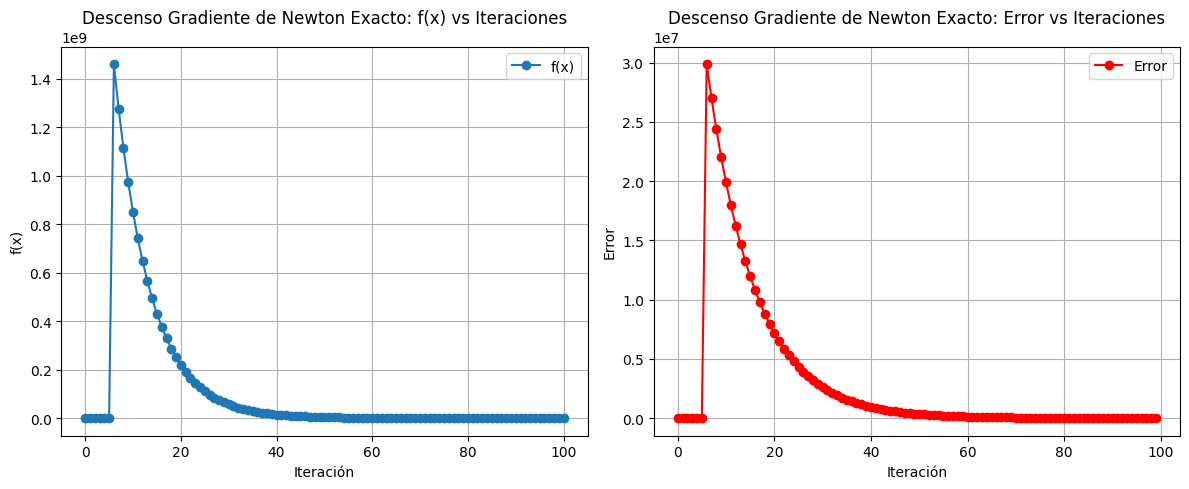

In [12]:
mostrar_resultados("Descenso Gradiente de Newton Exacto", *resultado_newton_exacto)